Upload your CSV file:


Saving energy_consumption.csv to energy_consumption (8).csv

First 5 rows of dataset:
     customer_id customer_type    regions  building_size_m2  occupants  \
0  CUSTOMER_0001   residential  Northeast                24          2   
1  CUSTOMER_0002    commercial    Midwest                24          1   
2  CUSTOMER_0003    commercial  Southeast                24          1   
3  CUSTOMER_0004   residential  Northeast                45          4   
4  CUSTOMER_0005   residential  Southeast                45          4   

   energy_cost_brl  
0            64.51  
1            55.26  
2            74.54  
3           147.06  
4           143.06  

Target converted to 3 classes (Low / Medium / High)

MODEL PERFORMANCE
Accuracy: 0.437

Classification Report:
              precision    recall  f1-score   support

        High       0.49      0.65      0.56       511
         Low       0.38      0.21      0.27       513
      Medium       0.41      0.45      0.43       476

    accuracy 

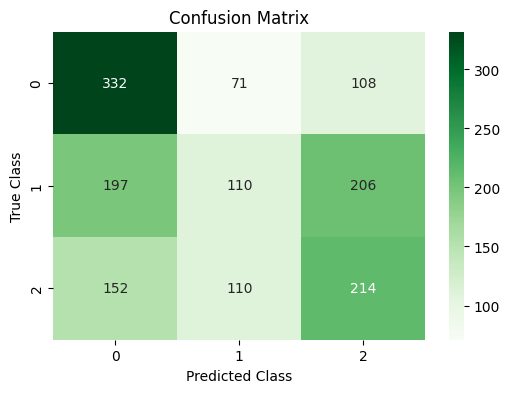

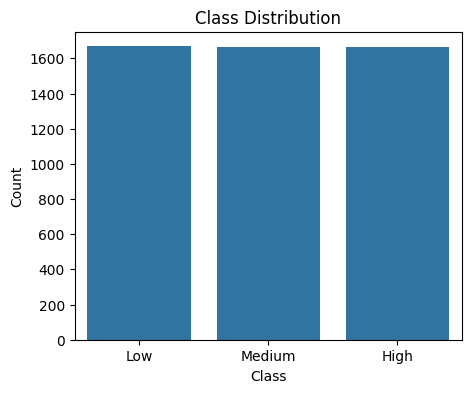


 All graphs generated successfully!


In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.decomposition import PCA

print("Upload your CSV file:")
uploaded = files.upload()
file_name = list(uploaded.keys())[0]

df = pd.read_csv(file_name)
print("\nFirst 5 rows of dataset:")
print(df.head())


X = df.iloc[:, :-1]
y = df.iloc[:, -1]

if y.dtype != 'object' and y.nunique() > 10:
    y = pd.qcut(y, q=3, labels=["Low", "Medium", "High"])
    print("\nTarget converted to 3 classes (Low / Medium / High)")

for col in X.columns:
    if X[col].dtype == 'object':
        X[col] = LabelEncoder().fit_transform(X[col])

if y.dtype == 'object':
    y = LabelEncoder().fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

model = LinearDiscriminantAnalysis()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("\nMODEL PERFORMANCE")
print("Accuracy:", round(accuracy_score(y_test, y_pred), 3))
print("\nClassification Report:")
print(classification_report(y_test, y_pred, zero_division=0))

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

plt.figure(figsize=(5,4))
sns.countplot(x=y)
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()


print("\n All graphs generated successfully!")


Implementing Bayesian Decision Theory
Objective: Implement Bayesian Decision Theory for classification.
Tasks: Write a Python program to classify a given dataset using Bayesian
Decision Theory.